# Loading Master Data with 78 Features

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# import necessary libraries
import pandas as pd
import os
import glob

# Import pre-processed data  
master = pd.read_csv('/content/drive/Shareddrives/Team Three Seasons/Cycle 3/Machine Learning/master_dataset.csv')
master = master.drop(columns = ['Unnamed: 0'])
master = master.dropna(axis=0)

In [ ]:
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification
# from sklearn.metrics import classification_report
# #finding the most important features
# #using 50 treees
# clf = RandomForestClassifier(n_estimators = 78, criterion = "gini",oob_score = True)
# y = master['label']
# X = master.drop('label', axis=1)
# y_test = master['label']
# X_test = master.drop('label', axis=1)
# clf.fit(X, y)
# y_pred = clf.predict(X_test)
# print(classification_report(y_test, y_pred))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

y = master['label']
X = master.drop('label', axis=1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X)

# X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30, random_state=0, stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.20, random_state=0)

In [ ]:
# Objective 1 Dataset (Falls vs. No-Falls)
xx = master.copy()
a = xx['label'].replace(['A1','A2','A3','A4','A5','A6','A7','A8','A9','A12',
                             'A13','A14','A15','A16','A17','F1','F2','F3','F4',
                             'F5','F6','F7','F8','F9','F10','F11','F12','F13'],
                            [0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1],
                            inplace=False)
b = xx
b['label'] = a

y_binary = b['label']
X_binary = b.drop('label', axis=1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X_binary)

# X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.30, random_state=0, stratify=y)
Xbinary_train, Xbinary_test, ybinary_train, ybinary_test = train_test_split(X_std, y_binary, test_size=0.20, random_state=0)

In [ ]:
# Objective 3 (only activities)
aa = master.copy()
aa = aa[aa.label != 'F1']
aa = aa[aa.label != 'F2']
aa = aa[aa.label != 'F3']
aa = aa[aa.label != 'F4']
aa = aa[aa.label != 'F5']
aa = aa[aa.label != 'F6']

y_act = aa['label']
X_act = aa.drop('label', axis=1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X_act)

Xact_train, Xact_test, yact_train, yact_test = train_test_split(X_std, y_act, test_size=0.20, random_state=0)

In [ ]:
# Objective 3 (only falls)
ff = master.copy()
ff = ff[ff.label != 'A1']
ff = ff[ff.label != 'A2']
ff = ff[ff.label != 'A3']
ff = ff[ff.label != 'A4']
ff = ff[ff.label != 'A5']
ff = ff[ff.label != 'A6']
ff = ff[ff.label != 'A7']
ff = ff[ff.label != 'A8']
ff = ff[ff.label != 'A9']
ff = ff[ff.label != 'A10']
ff = ff[ff.label != 'A11']
ff = ff[ff.label != 'A12']
ff = ff[ff.label != 'A13']
ff = ff[ff.label != 'A14']
ff = ff[ff.label != 'A15']
ff = ff[ff.label != 'A16']
ff = ff[ff.label != 'A17']
ff = ff[ff.label != 'F1']
ff = ff[ff.label != 'F6']

y_ff = ff['label']
X_ff = ff.drop('label', axis=1)

scaler = StandardScaler()
X_std = scaler.fit_transform(X_ff)

Xf_train, Xf_test, yf_train, yf_test = train_test_split(X_std, y_ff, test_size=0.20, random_state=0)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import sklearn
import sklearn.metrics as metrics
from sklearn.metrics import classification_report
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier

# Multi-Class Logistic Regression

In [ ]:
# # Perform GridSearchCV to tune best-fit LR model
# param = {'C': [10**-2,10**-1,10**0,10**1,10**2]}
# ?
# lr_model = LogisticRegression(multi_class='ovr')
# gs_model = GridSearchCV(estimator=lr_model, param_grid=param)
# gs_model.fit(X_train, y_train)

In [ ]:
# print("Best parameters are: ", gs_model.best_params_)

In [ ]:
# Binary model falls vs. no falls
clf = RandomForestClassifier(n_estimators = 78, criterion = "entropy",oob_score = True)
clf.fit(Xbinary_train, ybinary_train)
y_pred = clf.predict(Xbinary_test)
print(classification_report(ybinary_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       1.00      0.86      0.92        14

    accuracy                           0.95        40
   macro avg       0.96      0.93      0.94        40
weighted avg       0.95      0.95      0.95        40



In [ ]:
# Cycle 3 objective (only activities)
model = LogisticRegression()
model.fit(Xact_train, yact_train)
lrmodel_pred = model.predict(Xact_test)
print(classification_report(yact_test, lrmodel_pred))

              precision    recall  f1-score   support

          A1       1.00      0.60      0.75         5
         A12       1.00      1.00      1.00         1
         A13       1.00      1.00      1.00         1
         A14       1.00      0.67      0.80         3
         A15       0.50      1.00      0.67         1
         A16       1.00      1.00      1.00         2
         A17       0.50      1.00      0.67         1
          A2       0.67      0.67      0.67         3
          A3       1.00      1.00      1.00         1
          A4       1.00      0.50      0.67         2
          A5       0.00      0.00      0.00         0
          A6       1.00      1.00      1.00         2
          A7       1.00      1.00      1.00         1
          A8       1.00      1.00      1.00         3
          A9       1.00      1.00      1.00         2

    accuracy                           0.82        28
   macro avg       0.84      0.83      0.81        28
weighted avg       0.93   

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samp

In [ ]:
# Cyle 3 objectives (only falls)
model = LogisticRegression()
model.fit(Xf_train, yf_train)
lrmodel_pred = model.predict(Xf_test)
print(classification_report(yf_test, lrmodel_pred))

              precision    recall  f1-score   support

          F2       0.33      1.00      0.50         1
          F3       0.00      0.00      0.00         2
          F4       0.67      0.67      0.67         3
          F5       1.00      1.00      1.00         2

    accuracy                           0.62         8
   macro avg       0.50      0.67      0.54         8
weighted avg       0.54      0.62      0.56         8



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
# Overall classification
model = LogisticRegression()
model.fit(X_train, y_train)
lrmodel_pred = model.predict(X_test)
print(classification_report(y_test, lrmodel_pred))

              precision    recall  f1-score   support

          A1       1.00      0.25      0.40         4
         A12       1.00      1.00      1.00         2
         A13       1.00      1.00      1.00         2
         A14       0.00      0.00      0.00         0
         A15       0.00      0.00      0.00         1
         A16       1.00      1.00      1.00         1
         A17       1.00      1.00      1.00         1
          A2       0.25      1.00      0.40         1
          A3       1.00      1.00      1.00         1
          A5       1.00      1.00      1.00         3
          A6       0.75      1.00      0.86         3
          A7       0.00      0.00      0.00         1
          A8       0.75      0.75      0.75         4
          A9       1.00      1.00      1.00         2
          F1       0.00      0.00      0.00         1
          F2       0.50      1.00      0.67         1
          F3       0.50      0.20      0.29         5
          F4       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no t

# KNN

<Figure size 432x288 with 0 Axes>

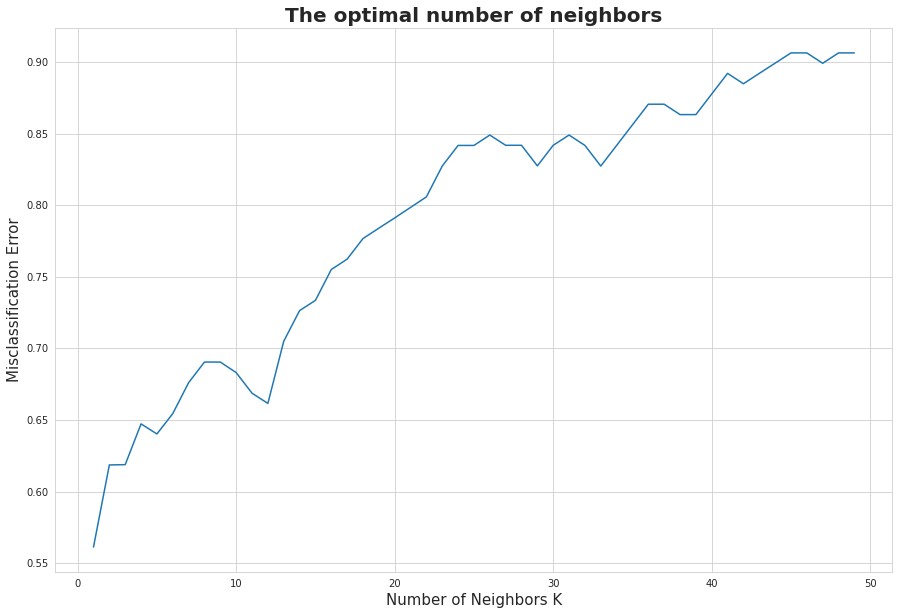

In [ ]:
# creating list of K for KNN
k_list = list(range(1,50))

# creating list of cv scores
cv_scores = []

# perform 10-fold cross validation
for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=2, scoring='accuracy')
    cv_scores.append(scores.mean())


# changing to misclassification error
MSE = [1-x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15,10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Misclassification Error', fontsize=15)
sns.set_style("whitegrid")
plt.plot(k_list, MSE)

plt.show()

In [ ]:
knn = KNeighborsClassifier(n_neighbors=1)
knn = knn.fit(X_train, y_train)
pred = knn.predict(X_test)

print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          A1       1.00      0.25      0.40         4
         A12       1.00      1.00      1.00         2
         A13       1.00      1.00      1.00         2
         A14       0.00      0.00      0.00         0
         A15       0.00      0.00      0.00         1
         A16       1.00      1.00      1.00         1
         A17       0.00      0.00      0.00         1
          A2       0.25      1.00      0.40         1
          A3       1.00      1.00      1.00         1
          A4       0.00      0.00      0.00         0
          A5       1.00      0.33      0.50         3
          A6       0.60      1.00      0.75         3
          A7       0.00      0.00      0.00         1
          A8       0.60      0.75      0.67         4
          A9       1.00      1.00      1.00         2
          F1       0.00      0.00      0.00         1
          F2       1.00      1.00      1.00         1
          F3       0.67    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1

# SVM

In [ ]:
regressor = SVC(C =10, kernel =  'rbf')
regressor = regressor.fit(X_train,y_train)
svm_pred = regressor.predict(X_test)
print(classification_report(y_test, svm_pred))

              precision    recall  f1-score   support

          A1       1.00      0.20      0.33         5
         A12       1.00      1.00      1.00         3
         A13       1.00      1.00      1.00         2
         A14       0.00      0.00      0.00         2
         A15       1.00      0.75      0.86         4
         A16       1.00      0.50      0.67         2
         A17       0.00      0.00      0.00         1
          A2       0.12      0.50      0.20         2
          A3       1.00      1.00      1.00         1
          A4       1.00      1.00      1.00         2
          A5       1.00      1.00      1.00         4
          A6       1.00      1.00      1.00         3
          A7       1.00      1.00      1.00         2
          A8       0.83      1.00      0.91         5
          A9       1.00      1.00      1.00         2
          F1       0.00      0.00      0.00         2
          F2       0.40      1.00      0.57         2
          F3       0.50    

# Random Forest

/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/usr/local/lib/python3.8/dist-packages/sklearn/ensemble/_forest.py:560: UserWarning: Some inputs do not have OOB scores. This probably means too few tre

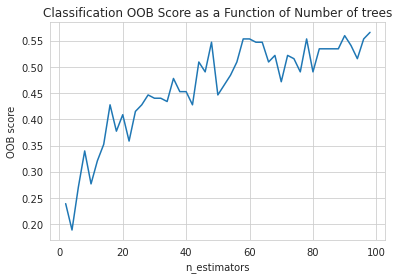

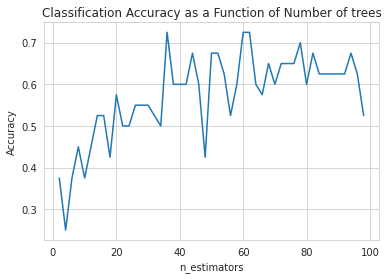

In [ ]:
n_trees = list(range(2,100,2))
oob_score_list = []
accuracy_list = []

for i in n_trees:
    clf = RandomForestClassifier(n_estimators = i, oob_score = True)
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    oob_score = clf.oob_score_
    oob_score_list.append(oob_score)
    accuracy_score = metrics.accuracy_score(y_test, y_pred)
    accuracy_list.append(accuracy_score)

#create plot to show relationship between numbers of trees and OOB score 

plt.plot(n_trees, oob_score_list)
plt.xlabel("n_estimators")
plt.ylabel("OOB score")
plt.title("Classification OOB Score as a Function of Number of trees")
plt.show()

plt.plot(n_trees, accuracy_list)
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.title("Classification Accuracy as a Function of Number of trees")
plt.show()

In [ ]:
def plot_feature_importance(importance,names,model_type):
  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)

  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data) 
  #keep only the top 20 features
  fi_df= fi_df.head(40)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(24,18))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')


def importance_dataframe(importance,names,model_type):
    #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)

  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data) 
  return fi_df

ACCURACY OF THE MODEL:  0.65
OOB Score 0.49056603773584906
None


,feature_names,feature_importance
0,acc_x,0.009286
1,acc_y,0.015391
2,acc_z,0.013854
3,gyro_x,0.012692
4,gyro_y,0.010164
...,...,...
73,jerk_Fpitch,0.006654
74,jerk_Froll,0.012292
75,F_JerkMagAcc,0.012983
76,F_JerkMagGyro,0.007002


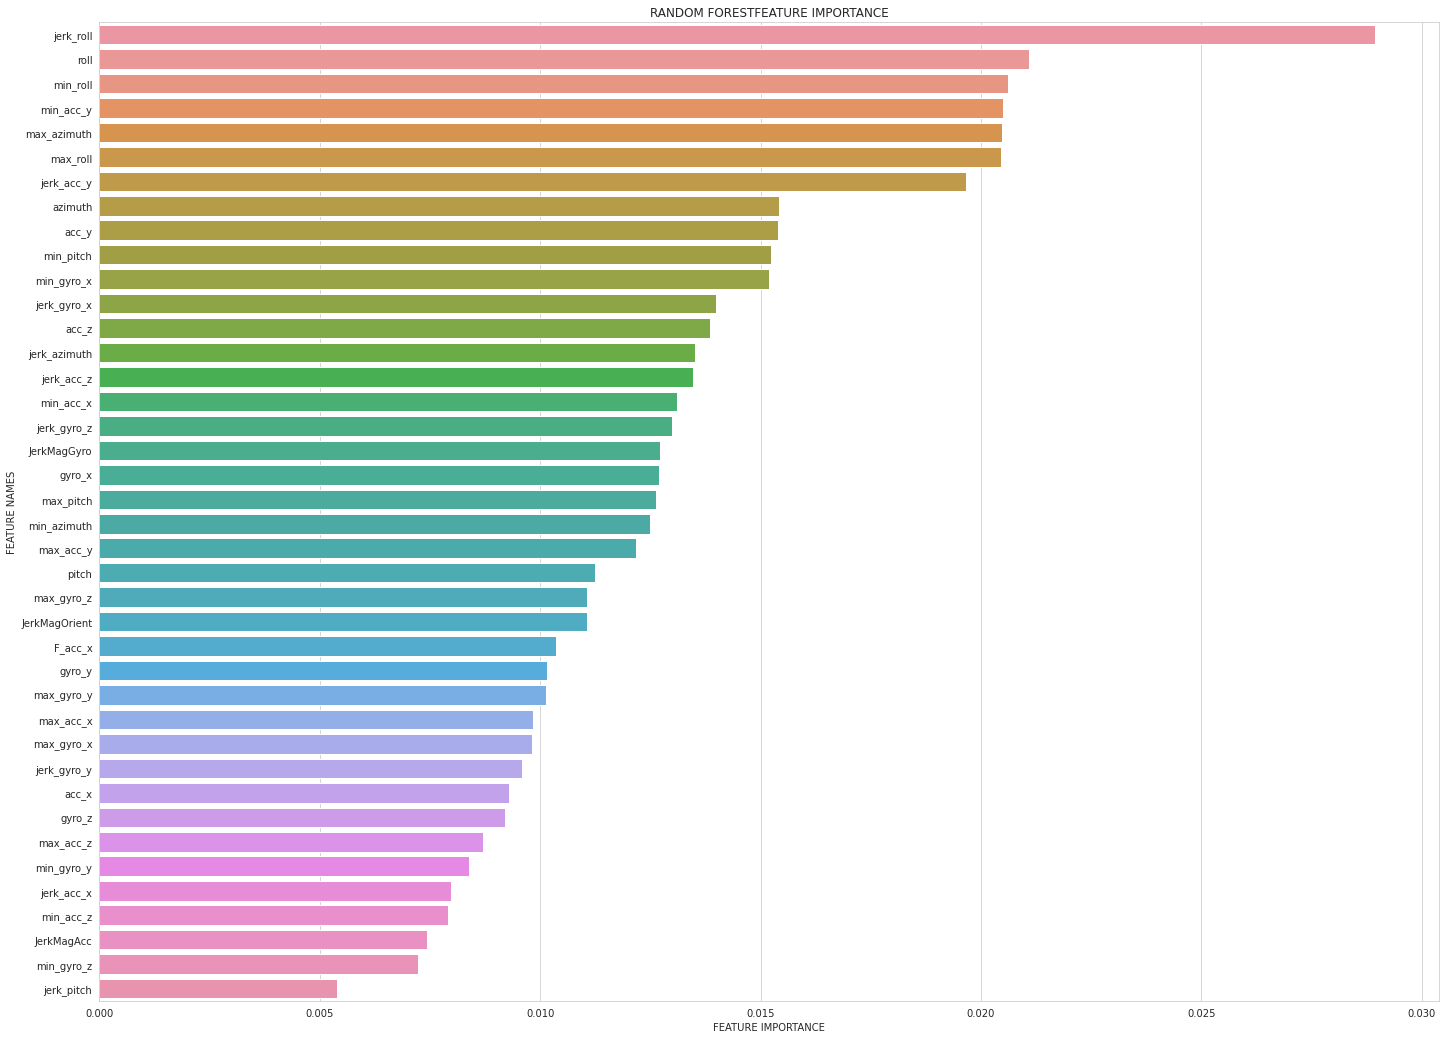

In [ ]:
#finding the most important features
#using 50 treees
clf = RandomForestClassifier(n_estimators = 78, criterion = "gini",oob_score = True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#calculate accuracy score
print("ACCURACY OF THE MODEL: ", sklearn.metrics.accuracy_score(y_test, y_pred))
#calculate OOB score
oob_score = clf.oob_score_
print("OOB Score",oob_score)


print(plot_feature_importance(clf.feature_importances_,X.columns,'RANDOM FOREST'))
feature_importances = importance_dataframe(clf.feature_importances_,X.columns,'RANDOM FOREST')
feature_importances

ACCURACY OF THE MODEL:  0.625
OOB Score 0.5345911949685535
None


,feature_names,feature_importance
0,acc_x,0.003707
1,acc_y,0.022349
2,acc_z,0.007268
3,gyro_x,0.006907
4,gyro_y,0.007352
...,...,...
73,jerk_Fpitch,0.010963
74,jerk_Froll,0.007226
75,F_JerkMagAcc,0.014854
76,F_JerkMagGyro,0.006159


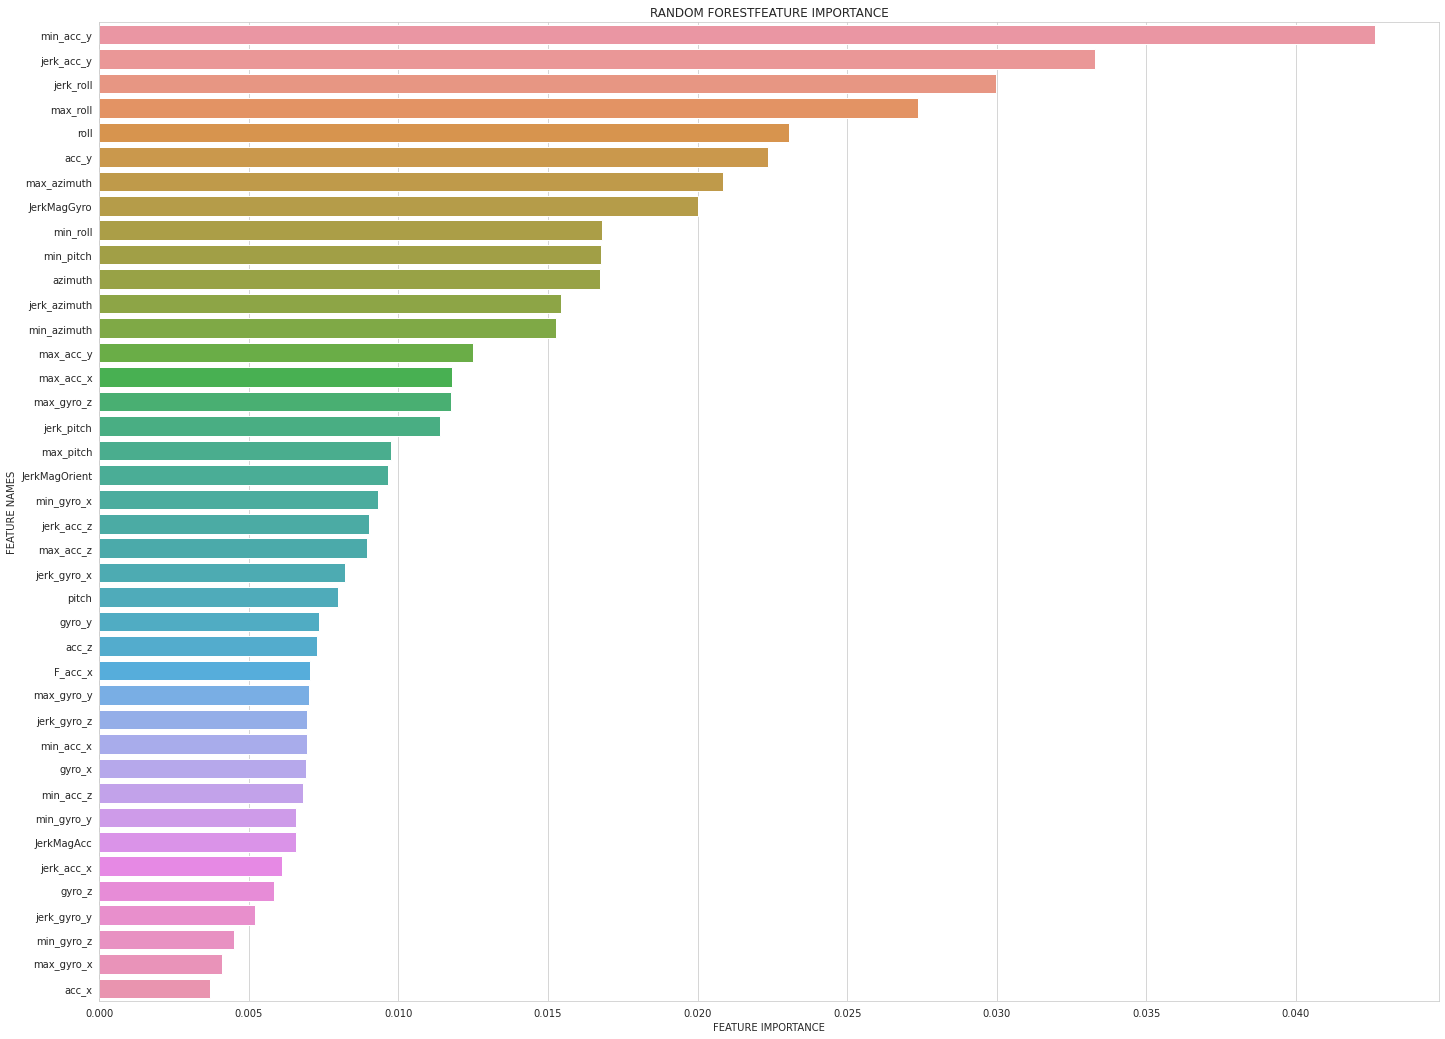

In [ ]:
#finding the most important features
#using 50 treees
clf = RandomForestClassifier(n_estimators = 78, criterion = "entropy",oob_score = True)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
#calculate accuracy score
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))
#calculate OOB score
oob_score = clf.oob_score_
print("OOB Score",oob_score)


print(plot_feature_importance(clf.feature_importances_,X.columns,'RANDOM FOREST'))
feature_importances = importance_dataframe(clf.feature_importances_,X.columns,'RANDOM FOREST')
feature_importances

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          A1       1.00      0.50      0.67         4
         A12       1.00      1.00      1.00         2
         A13       1.00      0.50      0.67         2
         A14       0.00      0.00      0.00         0
         A15       0.50      1.00      0.67         1
         A16       0.33      1.00      0.50         1
         A17       1.00      1.00      1.00         1
          A2       1.00      1.00      1.00         1
          A3       1.00      1.00      1.00         1
          A5       0.75      1.00      0.86         3
          A6       1.00      0.67      0.80         3
          A7       0.33      1.00      0.50         1
          A8       1.00      0.50      0.67         4
          A9       0.50      0.50      0.50         2
          F1       0.50      1.00      0.67         1
          F2       0.33      1.00      0.50         1
          F3       1.00      0.20      0.33         5
          F4       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Neural Network (MLP)

In [ ]:
# mlp_gs = MLPClassifier(max_iter=100)
# parameter_space = {
#     'hidden_layer_sizes': [(100,1), (50,100,50), (50,50,50)],
#     'activation': ['tanh', 'relu'],
#     'solver': ['sgd', 'adam'],
#     'alpha': [0.0001, 0.05],
#     'learning_rate': ['constant','adaptive'],
# }

# clf = GridSearchCV(mlp_gs, parameter_space, n_jobs=-1, cv=5)
# clf.fit(X_train, y_train) # X is train samples and y is the corresponding labels

In [ ]:
# print("Best parameters are: ", clf.best_params_)

In [ ]:
# means = clf.cv_results_['mean_test_score']
# stds = clf.cv_results_['std_test_score']
# for mean, std, params in zip(means, stds, clf.cv_results_['params']):
#     print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

In [ ]:
clf = MLPClassifier(max_iter=100, activation=  'tanh', alpha = 0.0001, hidden_layer_sizes = (50, 100, 50), learning_rate = 'adaptive', solver =  'adam', early_stopping=True)
clf = clf.fit(X_train, y_train)
y_true, y_pred = y_test , clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          A1       0.00      0.00      0.00         6
         A12       0.00      0.00      0.00         3
         A13       0.12      0.33      0.18         3
         A14       0.00      0.00      0.00         2
         A15       0.00      0.00      0.00         4
         A16       0.00      0.00      0.00         1
         A17       0.00      0.00      0.00         1
          A2       0.00      0.00      0.00         2
          A3       0.00      0.00      0.00         2
          A4       0.00      0.00      0.00         2
          A5       0.33      0.25      0.29         4
          A6       0.25      0.33      0.29         3
          A7       0.14      0.50      0.22         2
          A8       1.00      0.17      0.29         6
          A9       0.00      0.00      0.00         2
          F1       0.25      0.67      0.36         3
          F2       0.00      0.00      0.00         4
          F3       0.00    

/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Text(0.5, 1.0, 'Convergence of Test and Validation Set Errors')

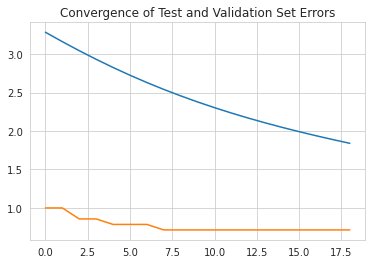

In [ ]:
#loss curves
plt.plot(clf.loss_curve_)
plt.plot(1-np.array(clf.validation_scores_))  #have to subtract validation scores from 1 to get error on validation set
plt.title("Convergence of Test and Validation Set Errors")
#we can clearly see convergence of error from the graph below

# 1 minute Data Tolerance Testing (Cycle 2 objective)

In [3]:
import pandas as pd
import numpy as np
def df_maker(testdf, type_domain):
  means = pd.DataFrame()
  maxes = pd.DataFrame()
  mins = pd.DataFrame()
  Jerk = pd.DataFrame()

  #group all rows by label of activity
  test = testdf.groupby(['label'])

  #add min and max values
  tester = test.mean()
  maxx = testdf.groupby(['label']).max()
  minn = testdf.groupby(['label']).min()

  # Renaming
  if type_domain == 'freq':
    tester = tester.rename(columns={"acc_x": "F_acc_x", "acc_y": "F_acc_y", "acc_z": "F_acc_z", "gyro_x": "F_gyro_x", "gyro_y": "F_gyro_y", "gyro_z": "F_gyro_z", "azimuth": "F_azimuth", "pitch": "F_pitch", "roll": "F_roll"})
    maxx = maxx.rename(columns={"acc_x": "Fmax_acc_x", "acc_y": "Fmax_acc_y", "acc_z": "Fmax_acc_z", "gyro_x": "Fmax_gyro_x", "gyro_y": "Fmax_gyro_y", "gyro_z": "Fmax_gyro_z", "azimuth": "Fmax_azimuth", "pitch": "Fmax_pitch", "roll": "Fmax_roll"})
    minn = minn.rename(columns={"acc_x": "Fmin_acc_x", "acc_y": "Fmin_acc_y", "acc_z": "Fmin_acc_z", "gyro_x": "Fmin_gyro_x", "gyro_y": "Fmin_gyro_y", "gyro_z": "Fmin_gyro_z", "azimuth": "Fmin_azimuth", "pitch": "Fmin_pitch", "roll": "Fmin_roll"})
    
    # Jerk
    dt = 150E-3 # 150ms
    avg_jerkk = tester/dt
    avg_jerkk = avg_jerkk.rename(columns={"F_acc_x": "jerk_Facc_x", "F_acc_y": "jerk_Facc_y", "F_acc_z": "jerk_Facc_z", "F_gyro_x": "jerk_Fgyro_x", "F_gyro_y": "jerk_Fgyro_y", "F_gyro_z": "jerk_Fgyro_z", "F_azimuth": "jerk_Fazimuth", "F_pitch": "jerk_Fpitch", "F_roll": "jerk_Froll"})
    avg_jerkk['F_JerkMagAcc'] = np.sqrt((avg_jerkk['jerk_Facc_x'])**2 + (avg_jerkk['jerk_Facc_y'])**2 + (avg_jerkk['jerk_Facc_z'])**2)
    avg_jerkk['F_JerkMagGyro'] = np.sqrt((avg_jerkk['jerk_Fgyro_x'])**2 + (avg_jerkk['jerk_Fgyro_y'])**2 + (avg_jerkk['jerk_Fgyro_z'])**2)
    avg_jerkk['F_JerkMagOrient'] = np.sqrt((avg_jerkk['jerk_Fazimuth'])**2 + (avg_jerkk['jerk_Fpitch'])**2 + (avg_jerkk['jerk_Froll'])**2)

  else:
    maxx = maxx.rename(columns={"acc_x": "max_acc_x", "acc_y": "max_acc_y", "acc_z": "max_acc_z", "gyro_x": "max_gyro_x", "gyro_y": "max_gyro_y", "gyro_z": "max_gyro_z", "azimuth": "max_azimuth", "pitch": "max_pitch", "roll": "max_roll"})
    minn = minn.rename(columns={"acc_x": "min_acc_x", "acc_y": "min_acc_y", "acc_z": "min_acc_z", "gyro_x": "min_gyro_x", "gyro_y": "min_gyro_y", "gyro_z": "min_gyro_z", "azimuth": "min_azimuth", "pitch": "min_pitch", "roll": "min_roll"})

    # Jerk
    dt = 150 # 150ms
    avg_jerkk = tester/dt
    avg_jerkk = avg_jerkk.rename(columns={"acc_x": "jerk_acc_x", "acc_y": "jerk_acc_y", "acc_z": "jerk_acc_z", "gyro_x": "jerk_gyro_x", "gyro_y": "jerk_gyro_y", "gyro_z": "jerk_gyro_z", "azimuth": "jerk_azimuth", "pitch": "jerk_pitch", "roll": "jerk_roll"})
    avg_jerkk['JerkMagAcc'] = np.sqrt((avg_jerkk['jerk_acc_x'])**2 + (avg_jerkk['jerk_acc_y'])**2 + (avg_jerkk['jerk_acc_z'])**2)
    avg_jerkk['JerkMagGyro'] = np.sqrt((avg_jerkk['jerk_gyro_x'])**2 + (avg_jerkk['jerk_gyro_y'])**2 + (avg_jerkk['jerk_gyro_z'])**2)
    avg_jerkk['JerkMagOrient'] = np.sqrt((avg_jerkk['jerk_azimuth'])**2 + (avg_jerkk['jerk_pitch'])**2 + (avg_jerkk['jerk_roll'])**2)


  #add aggregated data into master data frame
  means = means.append(tester)
  mins = mins.append(minn)
  maxes = maxes.append(maxx)
  Jerk = Jerk.append(avg_jerkk)

  # Moving labels from index to a column
  means = means.reset_index(drop=False)
  maxes = maxes.reset_index(drop=False)
  mins = mins.reset_index(drop=False)
  Jerk = Jerk.reset_index(drop=False)

  master = pd.concat([means,maxes,mins,Jerk], axis=1)
  return master

In [7]:
import pandas as pd
import numpy as np
time_test = pd.read_csv('data/Hour_Data_Stream.csv')
# time_test = time_test.drop(columns = ['Unnamed: 10'])
time_test = time_test.dropna(axis=0)
time_test = time_test.loc[~(time_test==0).all(axis=1)]
# time_test = time_test[60350:]
times = time_test['times']
time_test = time_test.drop(columns = ['times'])

In [8]:
time_test

,acc_x,acc_y,acc_z,gyro_x,gyro_y,gyro_z,azimuth,pitch,roll
0,-2.11,0.52,9.50,-0.75,0.31,-0.12,7.50,17.56,-41.50
1,-2.10,0.53,9.56,-0.63,0.81,-0.12,7.88,16.75,-40.38
2,-2.17,0.48,9.53,-1.44,0.75,-0.31,7.88,16.37,-41.50
3,-2.15,0.48,9.48,-0.63,0.12,-0.12,7.19,16.75,-41.88
4,-2.15,0.41,9.63,-1.94,-0.63,-0.06,7.88,17.19,-42.25
5,-2.22,0.45,9.53,-4.13,0.31,-1.00,7.19,16.75,-40.75
6,-2.18,0.51,9.51,-0.94,0.06,-0.31,7.88,17.19,-41.06
7,-2.17,0.49,9.52,-1.12,0.06,-0.06,8.69,16.37,-40.75
8,-2.17,0.49,9.49,0.19,0.31,0.00,7.88,17.19,-41.50
9,-2.16,0.47,9.47,0.19,0.19,0.06,7.50,17.19,-40.38


In [9]:
import numpy as np
master = pd.DataFrame()
inter = pd.DataFrame()
freq_inter = pd.DataFrame()
freqs_magnitude = pd.DataFrame()
for idx in time_test.columns:
  transformed_y = np.fft.fft(time_test[idx])
  # Take the absolute value of the complex numbers for magnitude spectrum
  freqs_magnitude[idx] = np.abs(transformed_y)

for index, row in time_test.iterrows():
  a = pd.DataFrame(row).transpose()
  inter = inter.append(df_maker(a, 'time'))
  # Apppending
  freq_inter = freq_inter.append(df_maker(a, 'freq'))


timetest_master = pd.concat([inter,freq_inter], axis=1)
timetest_master = timetest_master.drop(columns = ['index'])

C:\Users\Guest 01\AppData\Local\Temp\ipykernel_2408\522231821.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  means = means.append(tester)
C:\Users\Guest 01\AppData\Local\Temp\ipykernel_2408\522231821.py:46: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mins = mins.append(minn)
C:\Users\Guest 01\AppData\Local\Temp\ipykernel_2408\522231821.py:47: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  maxes = maxes.append(maxx)
C:\Users\Guest 01\AppData\Local\Temp\ipykernel_2408\522231821.py:48: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  Jerk = Jerk.append(avg_jerkk)
C:\Users\Guest 01\AppData\Local\Temp\ipykernel_2408\718302905.py:13: Futu

In [10]:
times

0     6:49:46
1     6:49:46
2     6:49:46
3     6:49:46
4     6:49:46
5     6:49:47
6     6:49:47
7     6:49:47
8     6:49:47
9     6:49:47
10    6:49:47
11    6:49:48
12    6:49:48
13    6:49:48
14    6:49:48
15    6:49:48
16    6:49:48
17    6:49:49
18    6:49:49
19    6:49:49
20    6:49:49
21    6:49:49
22    6:49:49
23    6:49:50
24    6:49:50
25    6:49:50
26    6:49:50
27    6:49:50
28    6:49:50
29    6:49:50
30    6:49:51
31    6:49:51
32    6:49:51
33    6:49:51
34    6:49:51
35    6:49:51
36    6:49:52
37    6:49:52
Name: times, dtype: object

Text(0, 0.5, 'Fall Status, 0 [No Fall] vs. 1 [Fall]')

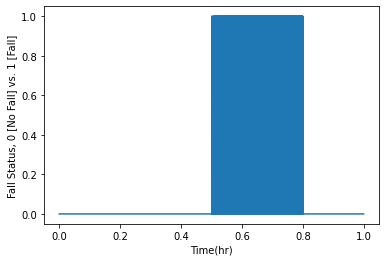

In [ ]:
# y = timetest_master['label']
# X = timetest_master.drop('label', axis=1)
# scaler = StandardScaler()
# X_std = scaler.fit_transform(X)
# y_pred = clf.predict(X_std)
# times = np.linspace(0,20.7,139)
# timetest_master.insert(0,'Prediction',y_pred)
# timetest_master.insert(0,'Times',times)
# a = timetest_master['label'].replace(['FOL', 'LYI', 'STD', 'WAL', 'SIT'],[1, 0, 0, 0, 0],inplace=False)
# b = timetest_master['Prediction'].replace(['FOL', 'LYI', 'STD', 'WAL', 'SIT'],[1, 0, 0, 0, 0],inplace=False)
# c = timetest_master
# c['label'] = a
# c['Prediction'] = b
import matplotlib.pyplot as plt
one_hr_pred = clf.predict(timetest_master)
results = pd.DataFrame({'results': one_hr_pred, 'time' : times})
timesss = np.linspace(0,1,len(results))
plt.plot(timesss, results['results'])
plt.xlabel('Time(hr)')
plt.ylabel('Fall Status, 0 [No Fall] vs. 1 [Fall]')

In [ ]:
results[round(0.8*len(results)):] = 0